<a href="https://colab.research.google.com/github/Kishan-Ved/MLDeepLab/blob/main/gradient_descent_multivariable_vectorized_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Gradient Descent for multiple features**
The following describes in detail the vectorized imiplementation of the algorithm of gradient descent for mltiple features represented by the vector x.

###**Cost Function**

In [22]:
def cost_func(x,y,w,b):
  cost = 0
  n_points = y.shape[0]
  for i in range(n_points):
    f = np.dot(w,x[i])+b
    cost += (f -y[i])**2
  cost = cost/(2*n_points)
  return cost

###**Derivative Function**

In [20]:
def derivative_func(x,y,w,b):
  n_points = y.shape[0]
  n_features = x[0].shape[0]
  dw = np.array([0]*n_features)
  db = 0
  for i in range(n_points):
    f = np.dot(w,x[i]) + b
    for j in range(n_features):
      dw[j] += (f - y[i])*x[i][j]/n_points
    db += (f - y[i])/n_points
  return dw, db

###**Gradient Descent Function**

In [9]:
def grad_desc(x,y,w,b,a,n,derivative_func, cost_func):
  cost_arr = []
  for i in range(n):
    dw,db = derivative_func(x,y,w,b)
    w = w - a * dw
    b = b - a * db
    cost = cost_func(x,y,w,b)
    cost_arr.append(cost)
    if(i%100==0 or i==n-1):
      print("iteration:",i+1,"w:", w,"b:", b, "cost:", cost)
  return w, b, cost, cost_arr

###**Implementation**

In [44]:
import numpy as np
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
w = np.array([0,0,0,0])
b = 0
a = 0.0000005
n = 100000

In [45]:
w,b,cost,cost_arr = grad_desc(x_train, y_train, w, b, a, n, derivative_func, cost_func)

iteration: 1 w: [2.413345e-01 5.580000e-04 1.830000e-04 6.034500e-03] b: 0.000145 cost: 2529.445907451492
iteration: 101 w: [ 0.2023515  0.0007205 -0.000998  -0.0021815] b: -0.00011984671618528004 cost: 695.9930856678557
iteration: 201 w: [ 0.2025335  0.0009705 -0.002148  -0.009355 ] b: -0.00035963602268744473 cost: 694.9289935685856
iteration: 301 w: [ 0.202715   0.0012205 -0.003298  -0.016518 ] b: -0.0005982983702994033 cost: 693.8710622039179
iteration: 401 w: [ 0.202896  0.001445 -0.004448 -0.023628] b: -0.0008358359588454846 cost: 692.8254981266464
iteration: 501 w: [ 0.2030755  0.001675  -0.005568  -0.0307165] b: -0.0010722555533169366 cost: 691.7882133976278
iteration: 601 w: [ 0.2032545  0.001925  -0.006668  -0.037777 ] b: -0.001307562678074441 cost: 690.7597559872951
iteration: 701 w: [ 0.203433   0.002175  -0.007768  -0.0447935] b: -0.001541761106294673 cost: 689.7419977161079
iteration: 801 w: [ 0.203611   0.002425  -0.008868  -0.0517985] b: -0.0017748583098112362 cost: 688.

###**Result of the model**

In [46]:
print("After 100000 iterations")
print("cost:", cost)

After 100000 iterations
cost: 563.768717592519


###**Visualizing the cost**

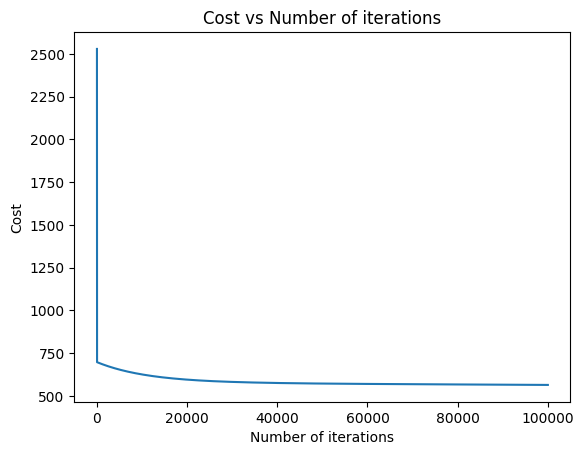

In [47]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,100001,1), cost_arr)
plt.title("Cost vs Number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()